# Proyek Akhir

Proyek akhir ini dirancang sebagai tugas individu di mana peserta akan menganalisis dataset yang telah diberikan. Dalam proyek ini, peserta akan menerapkan materi telah dipelajari untuk memahami pola dalam data dan menghasilkan insight yang bermanfaat.

Hasil akhir dari proyek ini akan disusun dalam dua bentuk utama: notebook (Google Colab) yang berisi kode dan hasil analisis, serta slide presentasi (PPT) yang merangkum proses dan temuan utama. Kedua output ini akan menjadi bukti pemahaman peserta dalam mengolah data dan menyampaikan hasil analisis secara efektif.

#I. Panduan
**Download dulu notebook ini dalam format .ipynb atau "save a copy in drive" kemudian kerjakan di google colab dan google drive masing-masing**

1. Berdasarkan Dataset pada link yang diberikan pada PPT Briefing Project EDA, upload data studi kasus.
2. Rancang Rumusan Permasalahan yang ingin ditemukan.
3. Lakukan analisis statistik deksriptif untuk memperoleh insight awal mengenai data mentah mengenai seputar informasi data penjualan, pelanggan, dan produk.
4. Lakukan data manipulation yang meliputi data cleaning dan data transformation. Tunjukkan transformasi yang dilakukan terhadap data berdasarkan materi yang telah dipelajari.
5.  Visualisasi data dalam menemukan pola, tren, dan karakteristik terhadap data supermarket SuperStore.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Input Data

In [ ]:
import pandas as pd

df = pd.read_excel('/content/SuperStore.xlsx')
df.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,address_city,...,price,quantity,sales,cost,profit,returns,payment_mode,year,month,day_name
0,4918,CA-2019-160304,2019-01-01,2019-01-07,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,73.94,1.0,73.94,45.6732,28.2668,0.0,Online,2019.0,1.0,Tuesday
1,4919,CA-2019-160304,2019-02-01,2019-01-07,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,57.98,3.0,173.94,135.6732,38.2668,0.0,Online,2019.0,2.0,Friday
2,4920,CA-2019-160304,2019-02-01,2019-01-07,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,115.99,2.0,231.98,164.7058,67.2742,0.0,Cards,2019.0,2.0,Friday
3,3074,CA-2019-125206,2019-03-01,2019-01-05,First Class,LR-16915,Lena Radford,Consumer,United States,Los Angeles,...,57.23,2.0,114.46,85.8450,28.6150,0.0,Online,2019.0,3.0,Friday
4,8604,US-2019-116365,2019-03-01,2019-01-08,Standard Class,CA-12310,Christine Abelman,Corporate,United States,San Antonio,...,15.04,2.0,30.08,35.3440,-5.2640,0.0,Online,2019.0,3.0,Friday


# Pemeriksaan Nilai yang Hilang

In [ ]:
#Memeriksa missing value menggunakan fungsi .isnull()
missing_values = df.isnull().sum()
print(missing_values)

#Memeriksa missing value menggunakan fungsi .isna() sama seperti .isnull
#Namun .isna digunakan untuk Data Frama pandas (NaN)
null_values = df.isna().sum()
print(null_values)

# Memperoleh persentase Missing Value pada data
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage

row_id           0
order_id         0
order_date       0
ship_date        0
ship_mode        0
customer_id      0
customer_name    0
segment          0
country          0
address_city     0
address_state    0
region           0
product_id       0
category         0
sub_category     0
product_name     0
price            4
quantity         4
sales            4
cost             4
profit           4
returns          4
payment_mode     4
year             4
month            4
day_name         4
dtype: int64
row_id           0
order_id         0
order_date       0
ship_date        0
ship_mode        0
customer_id      0
customer_name    0
segment          0
country          0
address_city     0
address_state    0
region           0
product_id       0
category         0
sub_category     0
product_name     0
price            4
quantity         4
sales            4
cost             4
profit           4
returns          4
payment_mode     4
year             4
month            4
day_name         4

,0
row_id,0.000000
order_id,0.000000
order_date,0.000000
ship_date,0.000000
ship_mode,0.000000
customer_id,0.000000
customer_name,0.000000
segment,0.000000
country,0.000000
address_city,0.000000


# Eksplorisasi Tipe Data

Pengecekan Tipe Data

In [ ]:
# Memeriksa tipe data setiap kolom
data_types = df.dtypes

# Merancang Data Frame baru untuk menampilkan tipe data
df_data_types = pd.DataFrame({'Column Name': data_types.index, 'Data Type': data_types.values})

# Menampilkan tabel dengan nama kolom dan tipe data
print(df_data_types)


      Column Name       Data Type
0          row_id           int64
1        order_id          object
2      order_date  datetime64[ns]
3       ship_date  datetime64[ns]
4       ship_mode          object
5     customer_id          object
6   customer_name          object
7         segment          object
8         country          object
9    address_city          object
10  address_state          object
11         region          object
12     product_id          object
13       category          object
14   sub_category          object
15   product_name          object
16          price         float64
17       quantity         float64
18          sales         float64
19           cost         float64
20         profit         float64
21        returns         float64
22   payment_mode          object
23           year         float64
24          month         float64
25       day_name          object


# Rumusan Masalah

1. Bagaimana pola dan tren penjualan berdasarkan kategori produk?

2. Bagaimana keuntungan yang diperoleh dari tiap kategori produk?

3. Bagaimana distribusi kuantitas produk yang terjual?

4. Bagaimana hubungan antara sales, profit, dan quantity?

5. Apakah terdapat outlier signifikan pada data profit?

# Statistik Deskriptif

### Ukuran Pemusatan

#### Mean

In [ ]:
# Mean (Rata-rata)
mean_values = df[['price', 'quantity', 'sales', 'cost', 'profit']].mean()
print("Mean (Rata-rata):")
print(mean_values)


Mean (Rata-rata):
price        79.837705
quantity      3.780566
sales       265.275889
cost        235.607939
profit       29.667950
dtype: float64


#### Median

In [ ]:
# Median
median_values = df[['price', 'quantity', 'sales', 'cost', 'profit']].median()
print("\nMedian:")
print(median_values)



Median:
price        42.242667
quantity      3.000000
sales       128.624000
cost        118.588800
profit        8.502000
dtype: float64


#### Modus

In [ ]:
# Modus
mode_values = df[['price', 'quantity', 'sales', 'cost', 'profit']].mode().iloc[0]
print("\nModus:")
print(mode_values)



Modus:
price        6.4800
quantity     2.0000
sales       12.9600
cost         6.7392
profit       0.0000
Name: 0, dtype: float64


### Ukuran Penyebaran

#### Range

In [ ]:
range_values = df[['price', 'quantity', 'sales', 'cost', 'profit']].max() - df[['price', 'quantity', 'sales', 'cost', 'profit']].min()
print("Range (Rentang) per Kolom:")
print(range_values)


Range (Rentang) per Kolom:
price        3269.648
quantity       13.000
sales        9099.094
cost        18999.989
profit      14999.954
dtype: float64


#### Variansi

In [ ]:
variance_values = df[['price', 'quantity', 'sales', 'cost', 'profit']].var()
print("\nVariance (Variansi) per Kolom:")
print(variance_values)



Variance (Variansi) per Kolom:
price        17515.976935
quantity         4.896549
sales       225065.605023
cost        212199.779945
profit       67430.491592
dtype: float64


#### Standar Deviasi

In [ ]:
std_dev_values = df[['price', 'quantity', 'sales', 'cost', 'profit']].std()
print("\nStandard Deviation (Standar Deviasi) per Kolom:")
print(std_dev_values)



Standard Deviation (Standar Deviasi) per Kolom:
price       132.347939
quantity      2.212815
sales       474.410798
cost        460.651473
profit      259.673818
dtype: float64


#### Inter Quartile Range (IQR)

In [ ]:
Q3 = df[['price', 'quantity', 'sales', 'cost', 'profit']].quantile(0.75)
Q1 = df[['price', 'quantity', 'sales', 'cost', 'profit']].quantile(0.25)
iqr_values = Q3 - Q1
print("\nInterquartile Range (IQR) per Kolom:")
print(iqr_values)



Interquartile Range (IQR) per Kolom:
price        78.5620
quantity      3.0000
sales       192.2040
cost        179.2184
profit       26.6424
dtype: float64


### Distribusi Data

#### Skewness

In [ ]:
skewness_values = df[['price', 'quantity', 'sales', 'cost', 'profit']].skew()
print("Skewness (Kemencengan) per Kolom:")
print(skewness_values)

Skewness (Kemencengan) per Kolom:
price       7.395656
quantity    1.218580
sales       5.947880
cost        5.781475
profit      8.431533
dtype: float64


#### Kurtosis

In [ ]:
kurtosis_values = df[['price', 'quantity', 'sales', 'cost', 'profit']].kurtosis()
print("\nKurtosis (Keruncingan) per Kolom:")
print(kurtosis_values)


Kurtosis (Keruncingan) per Kolom:
price       103.765628
quantity      1.760029
sales        54.714534
cost        108.238203
profit      409.883722
dtype: float64


# Data Manipulation

## Data Cleaning

#### Data dengan Na & NaN

1. Imputasi Missing Value

In [ ]:
# Cek missing value dulu
print("Missing values awal:\n", df.isnull().sum())

# Imputasi kolom numerik dengan median
num_cols = ['price', 'quantity', 'sales', 'cost', 'profit', 'returns', 'year', 'month']
for col in num_cols:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)

# Imputasi kolom kategorikal dengan modus
cat_cols = ['payment_mode', 'day_name']
for col in cat_cols:
    mode_val = df[col].mode()[0]
    df[col].fillna(mode_val, inplace=True)


print("\nMissing values setelah imputasi:\n", df.isnull().sum())

Missing values awal:
 row_id           0
order_id         0
order_date       0
ship_date        0
ship_mode        0
customer_id      0
customer_name    0
segment          0
country          0
address_city     0
address_state    0
region           0
product_id       0
category         0
sub_category     0
product_name     0
price            0
quantity         0
sales            0
cost             0
profit           0
returns          0
payment_mode     0
year             0
month            0
day_name         0
dtype: int64

Missing values setelah imputasi:
 row_id           0
order_id         0
order_date       0
ship_date        0
ship_mode        0
customer_id      0
customer_name    0
segment          0
country          0
address_city     0
address_state    0
region           0
product_id       0
category         0
sub_category     0
product_name     0
price            0
quantity         0
sales            0
cost             0
profit           0
returns          0
payment_mode     0

<ipython-input-31-831305804a8b>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)


2. Menghapus Missing Value

In [ ]:
df_dropped = df.dropna()
print(f"Data setelah hapus missing value, jumlah baris: {len(df_dropped)}")

Data setelah hapus missing value, jumlah baris: 5901


#### Data dengan Duplikat

In [ ]:
# Cek jumlah data duplikat
dup_count = df.duplicated().sum()
print(f"Jumlah data duplikat: {dup_count}")

# Hapus duplikat
df = df.drop_duplicates()
print(f"Data setelah hapus duplikat, jumlah baris: {len(df)}")

Jumlah data duplikat: 0
Data setelah hapus duplikat, jumlah baris: 5901


#### Data dengan Inkonsistensi

In [ ]:
cols_positive = ['price', 'quantity', 'sales', 'cost']

for col in cols_positive:
    neg_count = (df[col] < 0).sum()
    print(f"Jumlah nilai negatif di kolom '{col}': {neg_count}")

# Buang baris dengan nilai negatif pada kolom tsb
df = df[(df['price'] >= 0) & (df['quantity'] >= 0) & (df['sales'] >= 0) & (df['cost'] >= 0)]
print(f"Data setelah buang nilai negatif: {len(df)}")


Jumlah nilai negatif di kolom 'price': 0
Jumlah nilai negatif di kolom 'quantity': 0
Jumlah nilai negatif di kolom 'sales': 0
Jumlah nilai negatif di kolom 'cost': 14
Data setelah buang nilai negatif: 5887


#### Pemeriksaan Outlier

In [ ]:
def cek_outlier_iqr(data, kolom):
    Q1 = data[kolom].quantile(0.25)
    Q3 = data[kolom].quantile(0.75)
    IQR = Q3 - Q1
    batas_bawah = Q1 - 1.5 * IQR
    batas_atas = Q3 + 1.5 * IQR

    outlier = data[(data[kolom] < batas_bawah) | (data[kolom] > batas_atas)]
    print(f"Outlier pada kolom '{kolom}': {len(outlier)}")
    return outlier

for col in ['price', 'quantity', 'sales', 'profit']:
    cek_outlier_iqr(df, col)

Outlier pada kolom 'price': 463
Outlier pada kolom 'quantity': 86
Outlier pada kolom 'sales': 633
Outlier pada kolom 'profit': 1118


## Data Transformation

#### Aggregation

per kategori produk

In [ ]:
# Aggregation per kategori produk
agg_category = df.groupby('category').agg({
    'sales': 'sum',
    'profit': 'sum',
    'quantity': 'mean'
}).reset_index()

print(agg_category)


          category        sales      profit  quantity
0        Furniture  451352.9552   9594.0718  3.705128
1  Office Supplies  640684.4070  68795.0335  3.813236
2       Technology  461889.2150  67285.2507  3.735322


 per customer

In [ ]:
agg_customer = df.groupby('customer_id').agg({
    'sales': 'sum',
    'profit': 'sum',
    'quantity': 'sum'
}).reset_index()

print(agg_customer.head())


  customer_id     sales    profit  quantity
0    AA-10315  4919.552 -650.5971      19.0
1    AA-10375  2015.020  191.6403      20.0
2    AA-10480  1862.052  425.9418      34.0
3    AA-10645  1757.145  340.8478      34.0
4    AB-10015   563.940  116.8680       4.0


#### Normalization

Min-Max Scaling agar nilainya berada antara 0 dan 1:


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

cols_to_normalize = ['sales', 'profit']

df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])

print(df[cols_to_normalize].head())


      sales    profit
0  0.008034  0.569439
1  0.019024  0.570298
2  0.025403  0.572790
3  0.012487  0.569469
4  0.003214  0.566558


 Normalisasi Z-Score (Standarisasi) menggunakan mean dan standar deviasi:

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])

print(df[cols_to_normalize].head())


      sales    profit
0 -0.403462  0.017440
1 -0.191135  0.066960
2 -0.067900  0.210605
3 -0.317427  0.019164
4 -0.496589 -0.148606


# Data Visualization

# 1. Pola dan Tren Penjualan per Kategori Produk

<ipython-input-50-9132042ec2c6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=agg_category, x='category', y='sales', palette='Blues_d')


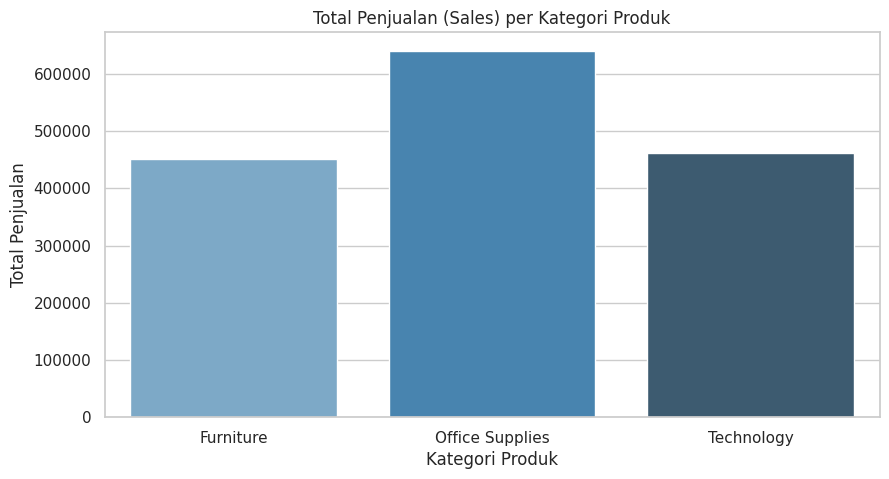

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=agg_category, x='category', y='sales', palette='Blues_d')
plt.title('Total Penjualan (Sales) per Kategori Produk')
plt.xlabel('Kategori Produk')
plt.ylabel('Total Penjualan')
plt.show()


Interpretasi: Grafik menunjukkan bahwa kategori Office Supplies mendominasi total penjualan, diikuti oleh Furniture dan Technology, mengindikasikan bahwa produk Office Supplies merupakan pilar utama dalam kontribusi penjualan SuperStore.

# 2. Keuntungan per Kategori Produk

<ipython-input-51-d15d4b451092>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=agg_category, x='category', y='profit', palette='Greens_d')


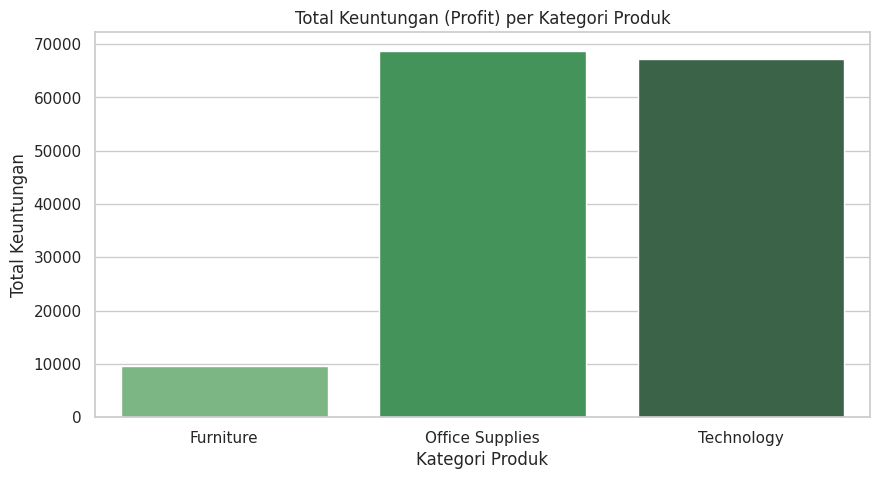

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=agg_category, x='category', y='profit', palette='Greens_d')
plt.title('Total Keuntungan (Profit) per Kategori Produk')
plt.xlabel('Kategori Produk')
plt.ylabel('Total Keuntungan')
plt.show()


Interpretasi: Meskipun kategori Office Supplies menghasilkan keuntungan terbesar dan Technology berada tepat di belakangnya, Furniture menunjukkan margin keuntungan yang lebih kecil dibanding total penjualan, menandakan perlunya evaluasi strategi harga dan efisiensi biaya pada kategori tersebut.

# 3. Distribusi Kuantitas Produk Terjual

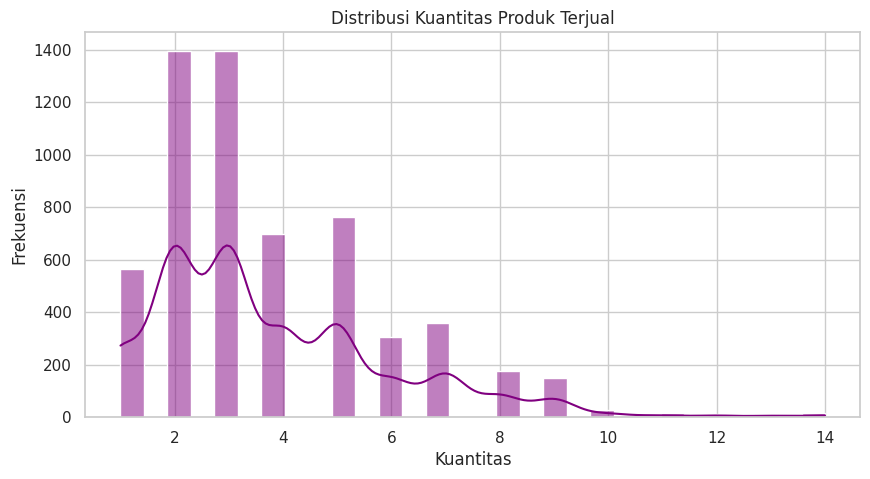

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df['quantity'], bins=30, kde=True, color='purple')
plt.title('Distribusi Kuantitas Produk Terjual')
plt.xlabel('Kuantitas')
plt.ylabel('Frekuensi')
plt.show()


Interpretasi:
Sebagian besar transaksi melibatkan kuantitas kecil, kebanyakan 1-5 unit per transaksi. Distribusi ini menunjukkan transaksi dengan jumlah besar sangat jarang, yang bisa menjadi perhatian untuk strategi penjualan.

# 4. Hubungan Sales, Profit, dan Quantity

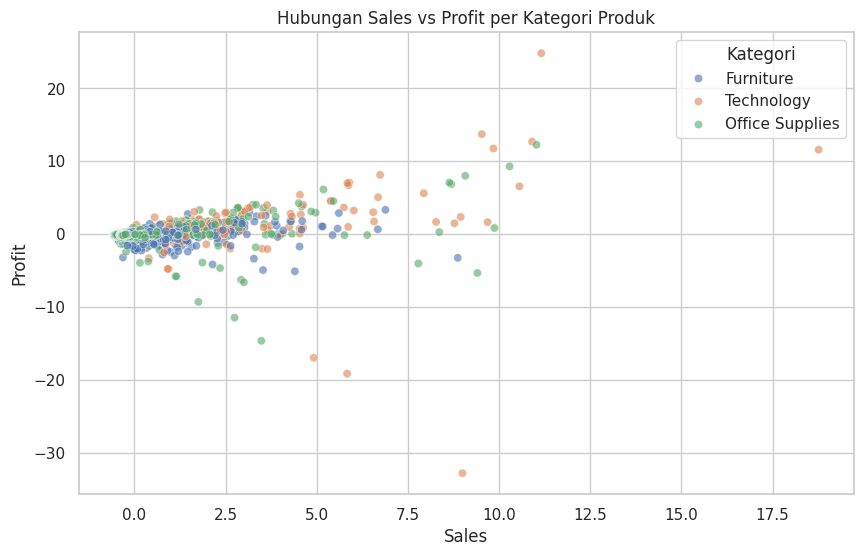

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='sales', y='profit', hue='category', alpha=0.6)
plt.title('Hubungan Sales vs Profit per Kategori Produk')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.legend(title='Kategori')
plt.show()


Interpretasi:
Terlihat bahwa semakin besar nilai penjualan (sales), umumnya keuntungan (profit) juga semakin tinggi, namun ada beberapa transaksi dengan penjualan besar tapi profit rendah atau negatif, yang perlu dianalisis lebih lanjut. Warna menunjukkan kategori, dengan Technology yang cenderung mendominasi area penjualan dan profit tinggi.

# 5. Pemeriksaan Outlier pada Profit

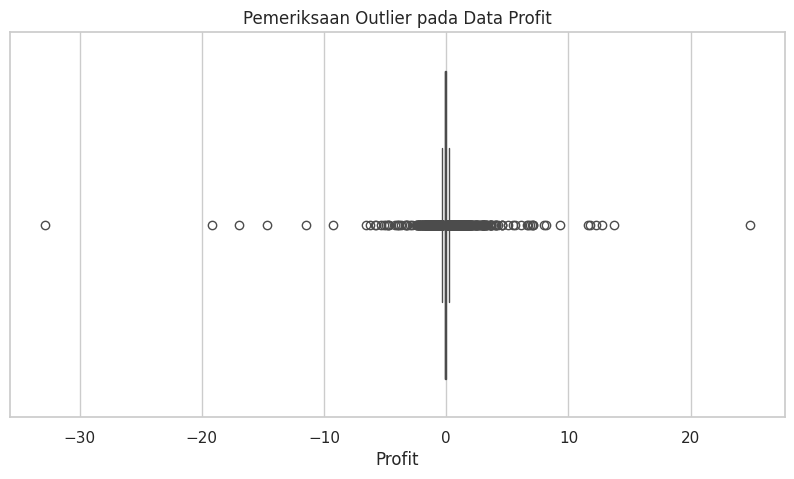

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['profit'])
plt.title('Pemeriksaan Outlier pada Data Profit')
plt.xlabel('Profit')
plt.show()


Interpretasi:
Boxplot menunjukkan adanya beberapa nilai profit ekstrim, baik positif maupun negatif, yang dapat dianggap outlier. Hal ini penting untuk diteliti karena outlier bisa mempengaruhi analisis statistik dan keputusan bisnis, serta bisa menunjukkan transaksi khusus atau kesalahan data.

#II. Pengumpulan
Download google colab ini dalam format .ipynb
Lalu kumpulkan di link pada PPT